<a href="https://colab.research.google.com/github/Davioliveira1305/Simulacao-Estocastica/blob/main/Lista3_Simula%C3%A7%C3%A3o_Estoc%C3%A1stica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1ª Questão letra A:**

**Taxa de chegada = 4**

**Demanda binomial com média 10 e p = 1/2**

**Taxa de reposição = 1/30**

**Ponto crítico(z) = 200**

**Capacidade(s) = 1000**

In [ ]:
import numpy as np
import heapq

class EstoqueSimulacao:
    def __init__(self, taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade):
        self.tempo_atual = 0
        self.tempo_simulacao = 0
        self.estoque = capacidade
        self.ponto_critico = ponto_critico
        self.capacidade = capacidade
        self.taxa_chegada_clientes = taxa_chegada_clientes
        self.media_demanda = media_demanda
        self.prob_demanda = prob_demanda
        self.taxa_reposicao = taxa_reposicao
        self.eventos = []

    def chegada_cliente(self):
        tempo_chegada = self.tempo_atual + np.random.exponential(1/self.taxa_chegada_clientes)
        heapq.heappush(self.eventos, (tempo_chegada, 'chegada_cliente'))

    def venda_produto(self):
        demanda = np.random.binomial(self.media_demanda, self.prob_demanda)
        if self.estoque >= demanda:
          self.estoque -= demanda
          if self.estoque < self.ponto_critico and self.estoque + demanda >= self.ponto_critico:
              self.agendar_reposicao()

    def agendar_reposicao(self):
        tempo_reposicao = self.tempo_atual + np.random.exponential(1/self.taxa_reposicao)
        heapq.heappush(self.eventos, (tempo_reposicao, 'reposicao_estoque'))
        print(f'Tempo: {self.tempo_simulacao}, Estoque: {self.estoque}, Evento = Agendamento de reposição')

    def reposicao_estoque(self):
        self.estoque = self.estoque + (self.capacidade - self.ponto_critico)

    def executar_simulacao(self, tempo_simulacao):
        self.tempo_simulacao = tempo_simulacao
        self.chegada_cliente()

        while self.tempo_atual < self.tempo_simulacao:
            evento = heapq.heappop(self.eventos)
            self.tempo_atual, tipo_evento = evento

            if tipo_evento == 'chegada_cliente':
                self.chegada_cliente()
                self.venda_produto()

            elif tipo_evento == 'reposicao_estoque':
                self.reposicao_estoque()

            print(f'Tempo: {self.tempo_atual}, Estoque: {self.estoque}, Evento = {tipo_evento}')

# Parâmetros iniciais
taxa_chegada_clientes = 4
media_demanda = 10
prob_demanda = 0.5
taxa_reposicao = 1/30
ponto_critico = 200
capacidade = 1000
tempo_simulacao = 100

# Inicialização e execução da simulação
simulacao = EstoqueSimulacao(taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade)
simulacao.executar_simulacao(tempo_simulacao)


Tempo: 0.031506543454875385, Estoque: 997, Evento = chegada_cliente
Tempo: 0.11687245664628917, Estoque: 991, Evento = chegada_cliente
Tempo: 0.7903701932299066, Estoque: 987, Evento = chegada_cliente
Tempo: 0.9286577154556312, Estoque: 982, Evento = chegada_cliente
Tempo: 1.0271304376391692, Estoque: 975, Evento = chegada_cliente
Tempo: 1.0769433297230386, Estoque: 969, Evento = chegada_cliente
Tempo: 1.1278698101505973, Estoque: 964, Evento = chegada_cliente
Tempo: 1.1803479694662435, Estoque: 957, Evento = chegada_cliente
Tempo: 1.2473213312182878, Estoque: 951, Evento = chegada_cliente
Tempo: 1.4448735398482424, Estoque: 948, Evento = chegada_cliente
Tempo: 1.82504187489939, Estoque: 944, Evento = chegada_cliente
Tempo: 1.954073779395433, Estoque: 940, Evento = chegada_cliente
Tempo: 2.207368411002086, Estoque: 934, Evento = chegada_cliente
Tempo: 2.702736902611009, Estoque: 931, Evento = chegada_cliente
Tempo: 2.7483174012720415, Estoque: 927, Evento = chegada_cliente
Tempo: 3.010

1ª Questão Letra A

In [ ]:
import numpy as np
import heapq

class EstoqueSimulacao:
    def __init__(self, taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade):
        self.tempo_atual = 0
        self.tempo_simulacao = 0
        self.estoque = capacidade
        self.ponto_critico = ponto_critico
        self.capacidade = capacidade
        self.taxa_chegada_clientes = taxa_chegada_clientes
        self.media_demanda = media_demanda
        self.prob_demanda = prob_demanda
        self.taxa_reposicao = taxa_reposicao
        self.eventos = []
        self.clientes_atendidos = 0
        self.clientes_rejeitados = 0
        self.vetor_estoque = []
        self.vetor_ca = []
        self.vetor_cr = []

    def chegada_cliente(self):
        tempo_chegada = self.tempo_atual + np.random.exponential(1/self.taxa_chegada_clientes)
        heapq.heappush(self.eventos, (tempo_chegada, 'chegada_cliente'))

    def venda_produto(self):
        demanda = np.random.binomial(self.media_demanda, self.prob_demanda)
        if self.estoque >= demanda:
          self.estoque -= demanda
          if self.estoque < self.ponto_critico and self.estoque + demanda >= self.ponto_critico:
              self.agendar_reposicao()
        else:
          self.clientes_rejeitados = self.clientes_rejeitados + 1

    def agendar_reposicao(self):
        tempo_reposicao = self.tempo_atual + np.random.exponential(1/self.taxa_reposicao)
        heapq.heappush(self.eventos, (tempo_reposicao, 'reposicao_estoque'))
        print(f'Tempo: {self.tempo_simulacao}, Estoque: {self.estoque}, Evento = Agendamento de reposição, Clientes Atendidos = {self.clientes_atendidos}, Clientes Rejeitados= {self.clientes_rejeitados}')

    def reposicao_estoque(self):
        self.estoque = self.estoque + (self.capacidade - self.ponto_critico)

    def executar_simulacao(self, tempo_simulacao):
        self.tempo_simulacao = tempo_simulacao
        self.chegada_cliente()

        while self.tempo_atual < self.tempo_simulacao:
            evento = heapq.heappop(self.eventos)
            self.tempo_atual, tipo_evento = evento

            if tipo_evento == 'chegada_cliente':
                self.chegada_cliente()
                self.venda_produto()
                self.clientes_atendidos = self.clientes_atendidos + 1

            elif tipo_evento == 'reposicao_estoque':
                self.reposicao_estoque()

            self.vetor_estoque.append(self.estoque)
            self.vetor_ca.append(self.clientes_atendidos)
            self.vetor_cr.append(self.clientes_rejeitados)
            print(f'Tempo: {self.tempo_atual}, Estoque: {self.estoque}, Evento = {tipo_evento}, Clientes Atendidos = {self.clientes_atendidos}, Clientes Rejeitados = {self.clientes_rejeitados}')



# Parâmetros iniciais
taxa_chegada_clientes = 4
media_demanda = 10
prob_demanda = 0.5
taxa_reposicao = 1/30
ponto_critico = 200
capacidade = 1000
tempo_simulacao = 100

# Inicialização e execução da simulação
simulacao = EstoqueSimulacao(taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade)
simulacao.executar_simulacao(tempo_simulacao)


Tempo: 0.12124811304508876, Estoque: 993, Evento = chegada_cliente, Clientes Atendidos = 1, Clientes Rejeitados = 0
Tempo: 0.6241824138745385, Estoque: 986, Evento = chegada_cliente, Clientes Atendidos = 2, Clientes Rejeitados = 0
Tempo: 0.6875994355528102, Estoque: 982, Evento = chegada_cliente, Clientes Atendidos = 3, Clientes Rejeitados = 0
Tempo: 0.7910493601031648, Estoque: 978, Evento = chegada_cliente, Clientes Atendidos = 4, Clientes Rejeitados = 0
Tempo: 0.8411683095756176, Estoque: 973, Evento = chegada_cliente, Clientes Atendidos = 5, Clientes Rejeitados = 0
Tempo: 1.0159873326993025, Estoque: 969, Evento = chegada_cliente, Clientes Atendidos = 6, Clientes Rejeitados = 0
Tempo: 1.0814255221171163, Estoque: 962, Evento = chegada_cliente, Clientes Atendidos = 7, Clientes Rejeitados = 0
Tempo: 1.3077826300478268, Estoque: 959, Evento = chegada_cliente, Clientes Atendidos = 8, Clientes Rejeitados = 0
Tempo: 1.6601768856815036, Estoque: 955, Evento = chegada_cliente, Clientes Ate

# 1ª Questão Letra B:

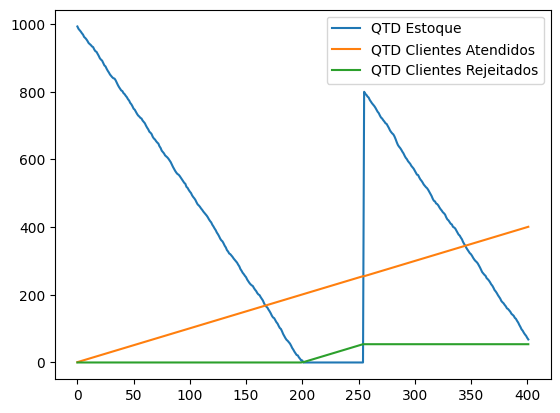

In [ ]:
import matplotlib.pyplot as plt
fig, aux = plt.subplots()
eixo_x = [i for i in range(len(simulacao.vetor_estoque))]
aux.plot(eixo_x, simulacao.vetor_estoque,label = 'QTD Estoque')
aux.legend(loc = 'upper right')
aux.plot(eixo_x, simulacao.vetor_ca, label = 'QTD Clientes Atendidos')
aux.legend(loc='upper right')
aux.plot(eixo_x, simulacao.vetor_cr, label = 'QTD Clientes Rejeitados')
aux.legend(loc = 'upper right')
plt.show()

# 1ª Questão Letra C:

In [ ]:
# Parâmetros iniciais
taxa_chegada_clientes = 4
media_demanda = 10
prob_demanda = 0.5
taxa_reposicao = 1/30
ponto_critico = 400
capacidade = 1000
tempo_simulacao = 100

# Inicialização e execução da simulação
simulacao = EstoqueSimulacao(taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade)
simulacao.executar_simulacao(tempo_simulacao)


Tempo: 0.16889313508679718, Estoque: 992, Evento = chegada_cliente, Clientes Atendidos = 1, Clientes Rejeitados = 0
Tempo: 0.2951339131472449, Estoque: 988, Evento = chegada_cliente, Clientes Atendidos = 2, Clientes Rejeitados = 0
Tempo: 0.7206934252572572, Estoque: 980, Evento = chegada_cliente, Clientes Atendidos = 3, Clientes Rejeitados = 0
Tempo: 0.7911202249110447, Estoque: 972, Evento = chegada_cliente, Clientes Atendidos = 4, Clientes Rejeitados = 0
Tempo: 0.9266331189209993, Estoque: 969, Evento = chegada_cliente, Clientes Atendidos = 5, Clientes Rejeitados = 0
Tempo: 1.0119760733961425, Estoque: 964, Evento = chegada_cliente, Clientes Atendidos = 6, Clientes Rejeitados = 0
Tempo: 2.0617774749961284, Estoque: 957, Evento = chegada_cliente, Clientes Atendidos = 7, Clientes Rejeitados = 0
Tempo: 2.269132455069171, Estoque: 951, Evento = chegada_cliente, Clientes Atendidos = 8, Clientes Rejeitados = 0
Tempo: 2.545249981600576, Estoque: 949, Evento = chegada_cliente, Clientes Atend

*Como o ponto crítico foi mudado para 400, os agendamentos de reposição acontecerão mais cedo, então diminui-se a probabilidade de termos muitos clientes rejeitados.*

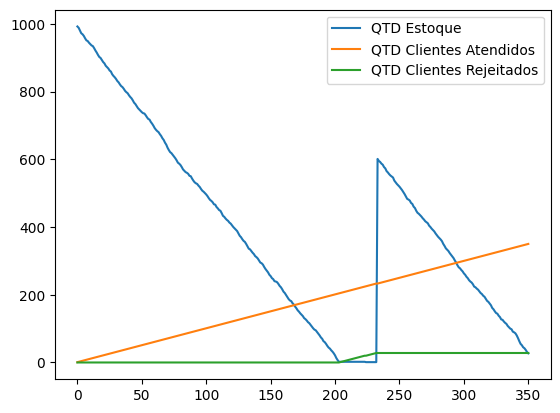

In [ ]:
import matplotlib.pyplot as plt
fig, aux = plt.subplots()
eixo_x = [i for i in range(len(simulacao.vetor_estoque))]
aux.plot(eixo_x, simulacao.vetor_estoque,label = 'QTD Estoque')
aux.legend(loc = 'upper right')
aux.plot(eixo_x, simulacao.vetor_ca, label = 'QTD Clientes Atendidos')
aux.legend(loc='upper right')
aux.plot(eixo_x, simulacao.vetor_cr, label = 'QTD Clientes Rejeitados')
aux.legend(loc = 'upper right')
plt.show()

# 2ª Questão

In [74]:
import random
from heapq import heappush, heappop
vetor_n = []
vetor_c = []

In [75]:
lamb = 10
mu = 1/20
rho = 2/5
c = 20
K0 = 5000
H = 100

In [76]:
# Eventos
# Um evento é uma tripla (tempo, nome, dados)

def atualizar_capital():
  return K + (t-d)*c*n

def adesao(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  n = n + 1
  if n == 1:
    heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
    heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )
  heappush(LEF, (t+random.expovariate(lamb), 'adesao', () ))
  d = t

def saida(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  n = n - 1
  if n > 0:
    heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
  d = t

def ocorrencia(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  if n > 0:
    x = random.normalvariate(50, 20)
    K = K - x
    heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )
  d = t


In [77]:
n = 10
K = K0
t = 0
d = 0

In [78]:
# Definir a lista de eventos futuros

LEF = []

# Eventos iniciais

heappush(LEF, (random.expovariate(lamb), 'adesao', () ) )
if n > 0:
  heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
  heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )

# Laço principal

while len(LEF) > 0 and t < H and K >=0:
  evento = heappop(LEF)
  t = evento[0]
  nome = evento[1]
  dados = evento[2]

  if nome == 'adesao':
    adesao(LEF, t, dados)
  elif nome == 'saida':
    saida(LEF, t, dados)
  elif nome == 'ocorrencia':
    ocorrencia(LEF, t, dados)

  print(f"{evento}, n={n}, capital={K}")
  vetor_n.append(n)
  vetor_c.append(K)

(0.09516605122126767, 'adesao', ()), n=11, capital=5019.0332102442535
(0.1625757074523645, 'adesao', ()), n=12, capital=5033.863334615095
(0.29062111464189067, 'ocorrencia', ()), n=12, capital=5013.424866168103
(0.4110323183196117, 'ocorrencia', ()), n=12, capital=4977.751969424878
(0.6036898266130957, 'adesao', ()), n=13, capital=5023.989771415314
(0.6487219825347668, 'adesao', ()), n=14, capital=5035.698131954949
(0.726413939687548, 'ocorrencia', ()), n=14, capital=5022.535278581302
(0.8000742708360709, 'ocorrencia', ()), n=14, capital=5007.634365785814
(0.8539602789730995, 'ocorrencia', ()), n=14, capital=4983.769418373366
(0.9404611193840415, 'adesao', ()), n=15, capital=5007.98965368843
(1.0578698186853452, 'adesao', ()), n=16, capital=5043.212263478821
(1.1809965104644193, 'adesao', ()), n=17, capital=5082.612804848125
(1.2552853472510326, 'adesao', ()), n=18, capital=5107.871009355574
(1.3824555488917523, 'ocorrencia', ()), n=18, capital=5098.393264257387
(1.4085598770921182, 'a

# 2ª Questão Letra A:

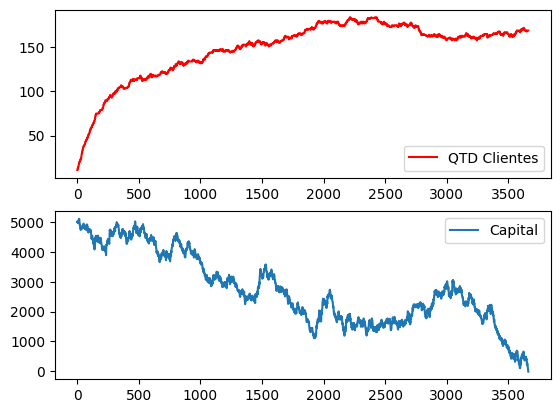

In [86]:
import matplotlib.pyplot as plt
fig, aux = plt.subplots(nrows = 2)
eixo_x = [i for i in range(len(vetor_n))]
aux[0].plot(eixo_x, vetor_n,label = 'QTD Clientes', c = 'r')
aux[0].legend(loc = 'lower right')
aux[1].plot(eixo_x, vetor_c, label = 'Capital')
aux[1].legend(loc='upper right')
plt.show()

# 2ª Questão Letra B: